## Stock Price Prediction Using LSTM

In [ ]:
import numpy as np       #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files #Dataset uploaded to cloab
uploaded = files.upload()

Saving Folds5x2_pp.csv to Folds5x2_pp.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Folds5x2_pp.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
fig = plt.figure()  # Stock performance analysis for the time period 2009-2019

axes1 = fig.add_axes([1, 1, 10, 4]) 
axes1.plot(df['timestamp'],df['Close Price'])
axes1.tick_params(axis="x", labelsize=30)
axes1.tick_params(axis="y", labelsize=30)

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_df = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close Price'])

for i in range (0,len(data)):
  new_df['Date'][i]=df['timestamp'][i]
  new_df['Close Price'][i]=df['Close Price'][i]

In [ ]:
new_df['day'] = pd.DatetimeIndex(new_df['Date']).day #Converting timestamp to datetimeindex
new_df['year'] = pd.DatetimeIndex(new_df['Date']).year
new_df['month'] = pd.DatetimeIndex(new_df['Date']).month

In [ ]:
len(new_df)

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


Using TensorFlow backend.


In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close Price'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close Price'][i] = data['Close Price'][i]


NameError: ignored

In [ ]:
len(new_data)

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
dataset = new_data.values

In [ ]:
train = dataset[0:987,:] #40 percent train and 60 percent test
valid = dataset[987:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
y_train.shape

NameError: ignored

In [ ]:
x_train.shape

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

In [ ]:
y_train.shape

NameError: ignored

In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

NameError: ignored

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

NameError: ignored

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize=(12,6))

plt.plot(valid[['Close Price','Predictions']])
plt.legend(valid.columns)

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 72s - loss: 0.0116
Epoch 2/10
 - 68s - loss: 0.0057
Epoch 3/10
 - 68s - loss: 0.0036
Epoch 4/10
 - 69s - loss: 0.0034
Epoch 5/10
 - 69s - loss: 0.0027
Epoch 6/10
 - 69s - loss: 0.0020
Epoch 7/10
 - 69s - loss: 0.0022
Epoch 8/10
 - 68s - loss: 0.0017
Epoch 9/10
 - 68s - loss: 0.0014
Epoch 10/10
 - 69s - loss: 0.0015


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2))) #################################result###############################
rms

Close Price    30.951987
Predictions    21.642425
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


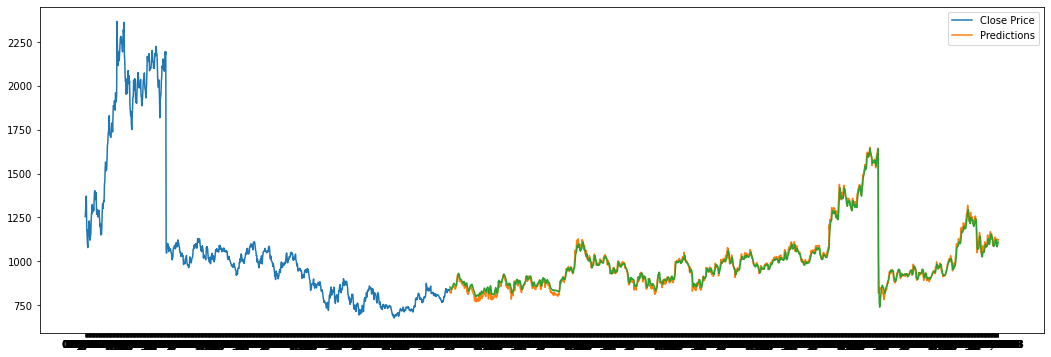

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize=(18,6))
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price','Predictions']])
plt.legend(valid.columns)